In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [15]:
X, y = [], []
with open('data/testSet.txt') as f:
    for line in f:
        row = line.strip().split('\t')
        X.append([float(i) for i in row[:2]])
        y.append(int(row[-1]))
        
X, y = np.array(X), np.array(y)

In [19]:
X.shape, y.shape

((100, 2), (100,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
reg = SVC(gamma='scale')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

1.0

In [31]:
scores = cross_val_score(reg, X, y, cv=5)
np.mean(scores)

1.0

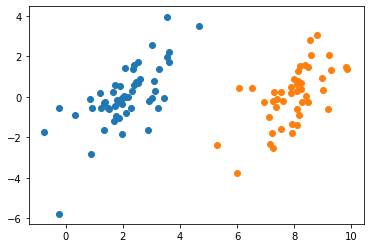

In [36]:
for y_i in np.unique(y):
    X_y = X[y == y_i]
    plt.scatter(X_y[:, 0],
                X_y[:, 1])

In [62]:
reg.intercept_, reg.support_vectors_

(array([-0.14813681]), array([[ 3.457096, -0.082216],
        [ 3.634009,  1.730537],
        [ 4.658191,  3.507396],
        [-0.236713, -5.766721],
        [ 2.893743, -1.643468],
        [ 8.804461,  3.044301],
        [ 6.543888,  0.433164],
        [ 5.286862, -2.358286],
        [ 6.080573,  0.418886],
        [ 6.016004, -3.753712]]))

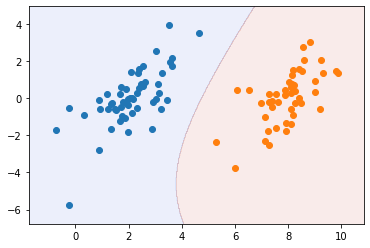

In [81]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
    
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for y_i in np.unique(y):
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z,
                 cmap=plt.cm.coolwarm, 
                 alpha=0.05)
    
    Xy = X[y == y_i]
    plt.scatter(Xy[:, 0], 
                Xy[:, 1])